In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
import matplotlib.cm as cm
import matplotlib.colors as mcol


In [3]:
# Change it according to your directory
fldlength = 2
idf = '48hfld' #identifier/classifier about the flood setting
iloc = 'c100'
intstring = '2hour' #time interval of output
nickname = 'agubh2' #model nickname, agubh2, gentle_wide etc
#floodname ='_5random'

#datnam = f'{idf}-datamaster-{intstring}.npy' #name of the data file to upload
dataloc = f'c-{idf}-{nickname}' #where csv files are
c_path = f'/Volumes/SAF_MSCWORK/Python/Stratigraphy/Data/nparrays/centroids/{dataloc}/{iloc}.npy'
#image_path = f'/Volumes/SAF_MSCWORK/Python/Stratigraphy/Plots/eigenstrat/eig-data-agubh2_crossmodel/{window}'

In [4]:
centroids = np.load(c_path, allow_pickle = True)
centroids = np.append(centroids, np.zeros([len(centroids), 1]), axis=1)


In [5]:
#crop centroids
print(centroids.shape)
#centroids = centroids[:25, :]
#print(centroids[:, 0])

(272, 15)


In [6]:
hoods = np.empty([1, 3]) #will hold the neighbourhoods the centroids could fall into and the age of the centroid
hoods[0] = centroids[0, :3]

thresh = 50 #distance threshold to call it a neighbour

for i, age in zip(range(1, len(centroids)), centroids[1:, 0]):
    potential_hoods = hoods[np.isclose(hoods[:, 0], age, atol=2)]
    
    if len(potential_hoods) == 0:
        hoods = np.append(hoods, np.reshape(centroids[i, :3], [1, 3]), axis=0)
        centroids[i, -1] = centroids[i, 0]
        
    else: 
        potential_hoods = np.reshape(potential_hoods, [len(potential_hoods), 3])    
        #print(i, potential_hoods)
        #print(potential_hoods.shape)
        #print(np.where(np.isclose(hoods[:, 0], age, atol=5)))
        #potential_hoods = np.resha
        #print('ph', potential_hoods)
        distances = np.array([])
    
    
        #test each potential hood for distance
        for row in potential_hoods:
        
            dist = ((centroids[i, 1]-row[1])**2 + (centroids[i, 2]-row[2])**2)**0.5
            distances = np.append(distances, dist)
        #print('dist shape', distances.shape, )
            #find nearest neighbour, append or make ner neighbourhood
    
        mindist = distances.min() #ifind minimum calculated distance between point and all potential neighbours
        potenti = potential_hoods[np.where(distances==mindist)]
        #print(distances)
        if mindist < thresh: 
            md_hood = np.where((hoods[:, :3] == potenti).all(axis=1))
            #print(md_hood)
            hoods[md_hood, 1:] = potenti[:, 1:]
            centroids[i, -1] = hoods[md_hood, 0]
        elif mindist > thresh:
            hoods = np.append(hoods, np.reshape(centroids[i, :3], [1, 3]), axis=0)
            centroids[i, -1] = centroids[i, 0]

In [7]:
neighbourhoods = np.unique(centroids[:, -1])
cnorm = mcol.Normalize(vmin=min(neighbourhoods),vmax=max(neighbourhoods))
cpick = cm.ScalarMappable(norm=cnorm,cmap='gist_earth') 
cpick.set_array([])

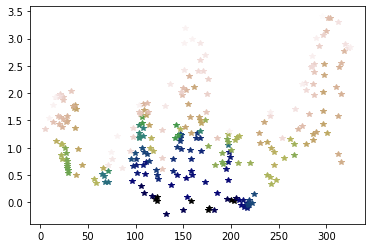

In [8]:
for i in range(0, len(centroids)):
    plt.plot(centroids[i, 1], centroids[i, 2], color = cpick.to_rgba(centroids[i, -1]), marker = '*')

In [9]:
print(neighbourhoods)

[  0.   3.   6.   9.  12.  15.  18.  21.  23.  24.  26.  27.  39.  40.
  42.  48.  53.  55.  56.  61.  75.  81.  87.  90.  92.  93.  96.  97.
  98. 100. 105. 107. 110. 111. 114. 115. 117. 119. 121. 122. 124. 126.
 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 140. 141. 143. 144.
 145. 146. 147. 149. 150. 152. 153. 155. 156. 158. 159. 160. 161. 163.
 164. 166.]
